### Visualize and compare a set of experiments
each experiment should be a yaml file

In [7]:
import yaml
import glob
import matplotlib.pyplot as plt
from os.path import join

In [8]:
# assume they're all named the same thing
fname = "evaluate_results.yaml"
# and have a shared parent dir
parent_dir = "../out/Deep_LP_train/mnist/bilinear_trim_new_442478"
glob_str = parent_dir + "**/**/" + fname

In [9]:
files = glob.glob(glob_str, recursive=True)
print(files)
assert len(files)

['../out/Deep_LP_train/mnist/bilinear_trim_new_442478/standard_trim_1/evaluate_results.yaml', '../out/Deep_LP_train/mnist/bilinear_trim_new_442478/standard_0/evaluate_results.yaml']


In [10]:
all_history = {}
for name in files:
    with open(name) as f:
        history = yaml.safe_load(f)
        if history is None or len(history) == 0:
            print(f"{name} is empty.")
            continue
        id = name.removeprefix(parent_dir + "/").rstrip("/" + fname)
        for tst in history:
            ks = [k for k in tst["transform"].keys() if k != "out_size"]
            if len(ks) == 0:
                key = "no transformation"
                val = 1
            else:
                key = list(ks)[0]
                val = tst["transform"][key]
            d = all_history.get(key, {})
            my_dict = d.get(id, {})
            my_dict[val] = tst["acc"]
            d[id] = my_dict
            all_history[key] = d                

3


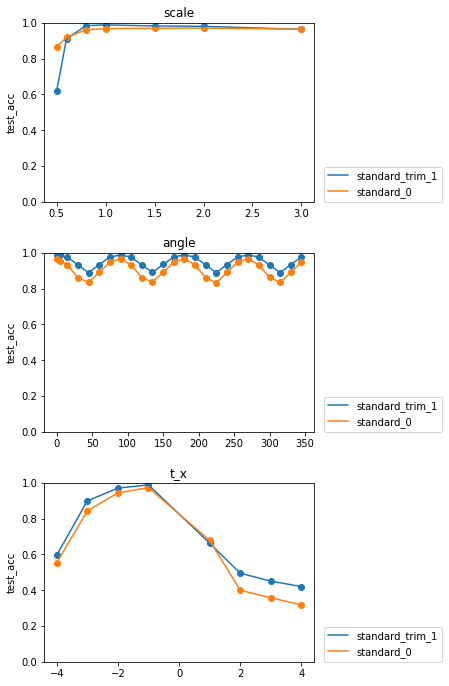

In [11]:
num_keys = len(all_history.keys())
print(num_keys)
num_runs = len(files)
f, ax = plt.subplots(num_keys, figsize=(5, 10))
f.tight_layout(pad=3.0)
if not hasattr(ax, "__getitem__"):
    ax = [ax]
for i, key in enumerate(all_history.keys()):
  runs = all_history[key]
  vals = runs.values()
  mx = max(map(max, vals))
  mn = min(map(min, vals))
  run_names = [*runs.keys()]
  ax[i].set_title(key)
  ax[i].set_ylim(top=1.0, bottom=0)
  bar_vals = []
  for j, run_name in enumerate(run_names):
    dct = runs[run_name]
    x, y = zip(*sorted(dct.items()))

    if key == "no transformation":
        bar_vals.append(y[0])
        run_names[j] = f"{run_name} (acc={y[0] :.4})"
    else: 
        ax[i].scatter(x, y, label=run_name)
        ax[i].plot(x, y, label=run_name)
    
  if len(bar_vals):   
    n = len(bar_vals)
    cmap = plt.cm.get_cmap("viridis", n)
    colors = [cmap(i) for i in range(n)]
    handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(n)]
    ax[i].set_xticks([])
    ax[i].bar(range(n), bar_vals, color=colors)
    ax[i].legend(handles, run_names, loc=(1.04,0))
  else:
    ax[i].legend(run_names, loc=(1.04,0))
  ax[i].set_ylabel("test_acc")

plt.show()

In [12]:
fig_fname = "evaluation_plots_ntau_extension.png"
f.savefig(join(parent_dir, fig_fname), bbox_inches="tight", facecolor='white')